# **MODEL TO DETECT HANDWRIITEN MATH SYMBOLS**

## **1.Importing Required Modules**

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2

## **1. Importing Data**
#### **a. Connecting to Google Drive**

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
import shutil
shutil.copy("/gdrive/MyDrive/dataset.zip", "/content/dataset.zip")

'/content/dataset.zip'

In [4]:
%cd /content

/content


In [5]:
!unzip -q dataset.zip 

**Now our dataset is located in the dataset folder. It contains 19 folders named `0, 1, 2, 3, 4, 5, 6, 7, 8, 9, add, dec, div, eq, mul, sub, x, y` and `z`. Total we have 10071 pictures. Here, we are displaying some random pictures.**

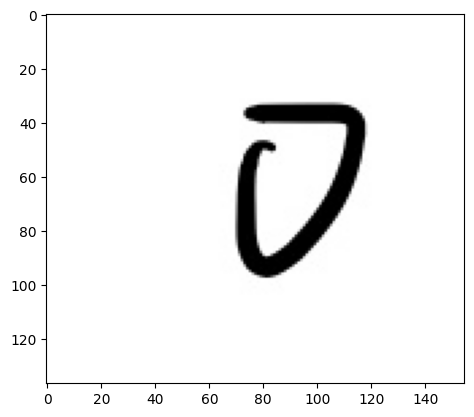

In [21]:
im1 = cv2.imread('dataset/0/10014.jpg',1)
plt.imshow(im1)
plt.show()

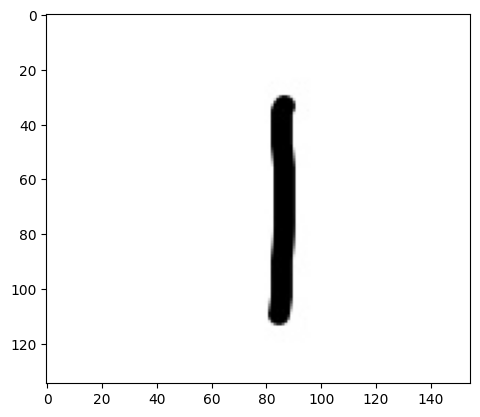

In [25]:
im2 = cv2.imread('dataset/1/10107.jpg', 1)
plt.imshow(im2)
plt.show()

## **Image Augmentation and Loading Data**

In [7]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [8]:
batch_size = 64

In [9]:
train_generator = train_datagen.flow_from_directory(
        '/content/dataset/',  # This is the source directory for training images
        target_size=(100, 100),  # All images will be resized to 150x150
        batch_size=batch_size,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical',
        color_mode ='grayscale'
        )


Found 10071 images belonging to 19 classes.


## **Defining Model**
**We are using a CNN Model built using Tensorflow**

In [16]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                              tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(19, activation='softmax')
])


## **Compiling Model**

Here is the structure of the model. We have 406,451 parameters to train.

In [17]:
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 10, 10, 64)      

## **Training Model**

In [18]:
history = model.fit(train_generator, epochs=50, steps_per_epoch=train_generator.samples // batch_size,  verbose = 1)

Epoch 1/50
157/157 [==============================] - 22s 129ms/step - loss: 2.6976 - accuracy: 0.1545
Epoch 2/50
157/157 [==============================] - 20s 130ms/step - loss: 2.1245 - accuracy: 0.3374
Epoch 3/50
157/157 [==============================] - 22s 143ms/step - loss: 1.7889 - accuracy: 0.4393
Epoch 4/50
157/157 [==============================] - 22s 141ms/step - loss: 1.5786 - accuracy: 0.5005
Epoch 5/50
157/157 [==============================] - 22s 140ms/step - loss: 1.3384 - accuracy: 0.5714
Epoch 6/50
157/157 [==============================] - 22s 142ms/step - loss: 1.1757 - accuracy: 0.6178
Epoch 7/50
157/157 [==============================] - 21s 134ms/step - loss: 1.0659 - accuracy: 0.6586
Epoch 8/50
157/157 [==============================] - 20s 130ms/step - loss: 0.9269 - accuracy: 0.6954
Epoch 9/50
157/157 [==============================] - 24s 150ms/step - loss: 0.8248 - accuracy: 0.7231
Epoch 10/50
157/157 [==============================] - 22s 141ms/step - l

In [19]:
history2 = model.fit(train_generator, epochs=10, steps_per_epoch=train_generator.samples // batch_size,  verbose = 1) 

Epoch 1/10
157/157 [==============================] - 23s 144ms/step - loss: 0.2320 - accuracy: 0.9276
Epoch 2/10
157/157 [==============================] - 21s 133ms/step - loss: 0.2399 - accuracy: 0.9216
Epoch 3/10
157/157 [==============================] - 21s 132ms/step - loss: 0.2316 - accuracy: 0.9270
Epoch 4/10
157/157 [==============================] - 24s 151ms/step - loss: 0.2511 - accuracy: 0.9228
Epoch 5/10
157/157 [==============================] - 21s 135ms/step - loss: 0.2255 - accuracy: 0.9302
Epoch 6/10
157/157 [==============================] - 24s 155ms/step - loss: 0.2353 - accuracy: 0.9271
Epoch 7/10
157/157 [==============================] - 22s 140ms/step - loss: 0.2192 - accuracy: 0.9326
Epoch 8/10
157/157 [==============================] - 20s 130ms/step - loss: 0.2287 - accuracy: 0.9284
Epoch 9/10
157/157 [==============================] - 22s 143ms/step - loss: 0.2212 - accuracy: 0.9282
Epoch 10/10
157/157 [==============================] - 22s 140ms/step - l

**We recieved an accuracy of 93%, which I believe will work for our use case, considering the harsh image augmentations we applied.**

In [28]:
class_names = list(train_generator.class_indices.keys())
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'dec', 'div', 'eq', 'mul', 'sub', 'x', 'y', 'z']


## **Predicting on our image**

In [27]:
import numpy as np
import cv2

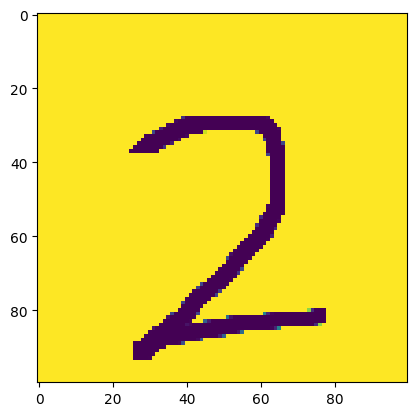

In [32]:
img = cv2.imread('0-bg.png', 0)
img = cv2.resize(img, (100, 100)) #resize the image to the input shape of your model
plt.imshow(img)
plt.show()
img = img / 255.0 #normalize the pixel values between 0 and 1
img = np.expand_dims(img, axis=0) #add a batch dimension


In [32]:
predictions = model.predict(img)
predicted_class = class_names[np.argmax(predictions)]
print(predicted_class)

2


## **Saving the model**

In [20]:
model.save('model.h5')